## Import libraries

In [97]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Read in Data and drop uneccessary variables


In [100]:
df = pd.read_csv('pokemon.csv')

In [101]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [102]:
print("shape of dataset :", df.shape)

shape of dataset : (721, 23)


In [103]:
df = df.drop(['Number'], axis=1) 
df = df.drop(['Name'], axis=1) 
df = df.drop(['Type_1'], axis=1)
df = df.drop(['Egg_Group_1'], axis=1)
df = df.drop(['Body_Style'], axis=1)
df = df.drop(['Catch_Rate'], axis=1)
df = df.drop(['hasGender'], axis=1)

## Remove those columns with null values

In [104]:
df.isnull().sum()

Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
Pr_Male              77
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
dtype: int64

### Check the percentage of missing vs. total values

In [105]:
530/721*100 # Egg-Group-2

73.50901525658807

In [106]:
df = df.drop(['Egg_Group_2'], axis=1)

In [107]:
371/721*100 # Type-2

51.45631067961165

In [108]:
df = df.drop(['Type_2'], axis=1)

In [109]:
df = df.drop(['Pr_Male'], axis=1)

## Change Binary Variables into 0 and 1 values

In [110]:
df.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg
0,318,45,49,49,65,65,45,1,False,Green,False,0.71,6.9
1,405,60,62,63,80,80,60,1,False,Green,False,0.99,13.0
2,525,80,82,83,100,100,80,1,False,Green,True,2.01,100.0
3,309,39,52,43,60,50,65,1,False,Red,False,0.61,8.5
4,405,58,64,58,80,65,80,1,False,Red,False,1.09,19.0


In [111]:
df[['isLegendary', 'hasMegaEvolution']]=df[['isLegendary', 'hasMegaEvolution']].astype('int')

In [112]:
df.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg
0,318,45,49,49,65,65,45,1,0,Green,0,0.71,6.9
1,405,60,62,63,80,80,60,1,0,Green,0,0.99,13.0
2,525,80,82,83,100,100,80,1,0,Green,1,2.01,100.0
3,309,39,52,43,60,50,65,1,0,Red,0,0.61,8.5
4,405,58,64,58,80,65,80,1,0,Red,0,1.09,19.0


## Encode Categorical Variables
### I used ordinal encoding

In [113]:
from sklearn.preprocessing import OrdinalEncoder

In [114]:
ord_enc = OrdinalEncoder()
df["Color"] = ord_enc.fit_transform(df[["Color"]])

In [115]:
df.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg
0,318,45,49,49,65,65,45,1,0,3.0,0,0.71,6.9
1,405,60,62,63,80,80,60,1,0,3.0,0,0.99,13.0
2,525,80,82,83,100,100,80,1,0,3.0,1,2.01,100.0
3,309,39,52,43,60,50,65,1,0,7.0,0,0.61,8.5
4,405,58,64,58,80,65,80,1,0,7.0,0,1.09,19.0


In [116]:
df.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.063800,4.131761,0.063800,1.144979,56.773370
std,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.244566,2.796943,0.244566,1.044369,89.095667
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.100000
25%,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000,2.000000,0.000000,0.610000,9.400000
50%,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.000000,4.000000,0.000000,0.990000,28.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.000000,7.000000,0.000000,1.400000,61.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,9.000000,1.000000,14.500000,950.000000


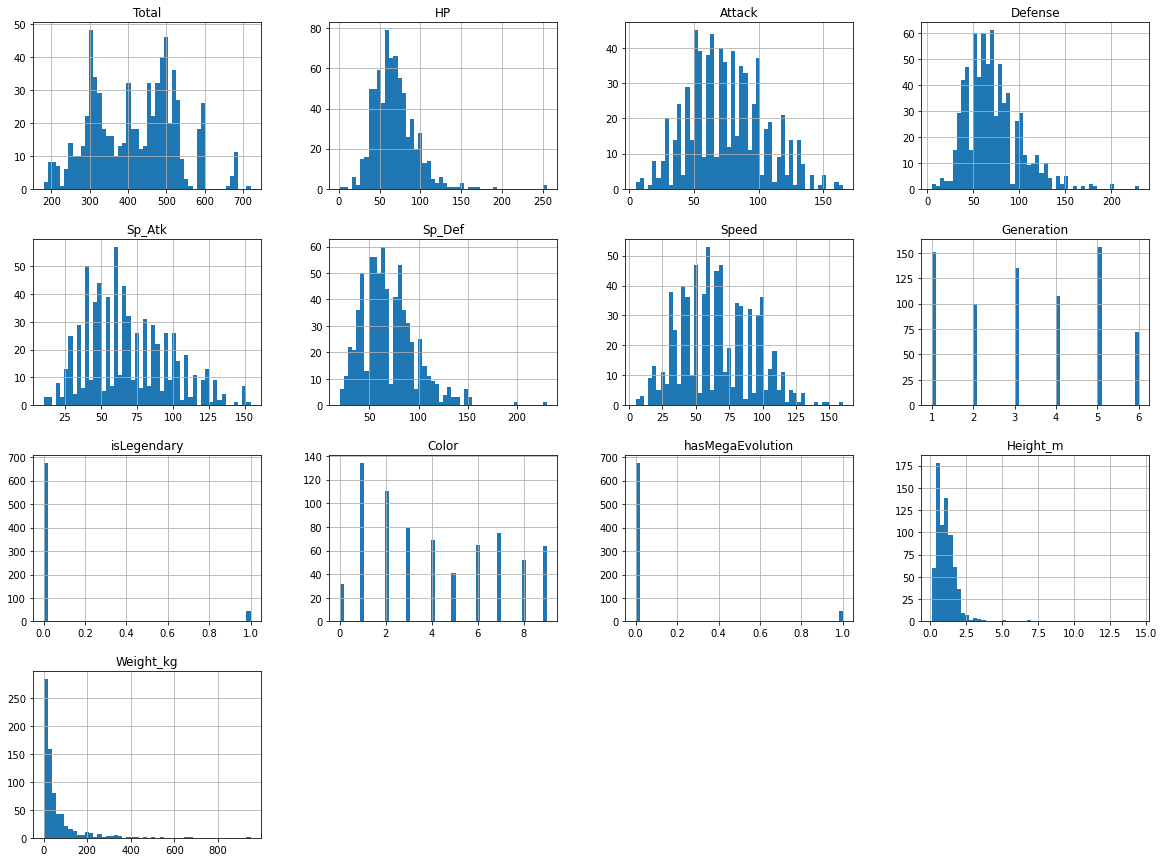

In [117]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [118]:
corr_matrix = df.corr()
corr_matrix["isLegendary"].sort_values(ascending=False)

isLegendary         1.000000
Total               0.481837
Weight_kg           0.425219
Sp_Atk              0.409739
Sp_Def              0.360215
Height_m            0.326323
Attack              0.302786
Speed               0.286082
Defense             0.274446
HP                  0.258926
Generation          0.071875
hasMegaEvolution    0.047955
Color               0.018150
Name: isLegendary, dtype: float64

## Create training and testing data sets
### Set 67% to training and 33% to testing

In [119]:
y = df['isLegendary']
x = df.drop(['isLegendary'], axis=1)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

In [121]:
y_test

278    0
500    0
432    0
600    0
404    0
      ..
38     0
357    0
494    0
539    0
191    0
Name: isLegendary, Length: 238, dtype: int64

## Decision Tree

In [122]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [123]:
cldt = tree.DecisionTreeClassifier()
cldt.fit(x_train, y_train) 
y_predict_dt = cldt.predict(x_test)
c_df = confusion_matrix(y_test, y_predict_dt)
c_df

array([[217,   6],
       [  2,  13]])

In [125]:
cr_dt = classification_report(y_test, y_predict_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       223
           1       0.68      0.87      0.76        15

    accuracy                           0.97       238
   macro avg       0.84      0.92      0.87       238
weighted avg       0.97      0.97      0.97       238



In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_dt)

0.9663865546218487

### 96.6% Accuracy

## SVM

In [89]:
from sklearn import svm

In [90]:
clsvm = svm.SVC()
clsvm.fit(x_train,y_train)
y_predict_svm = clsvm.predict(x_test)
c_svm = confusion_matrix(y_test, y_predict_svm)
c_svm

array([[221,   2],
       [ 11,   4]])

In [91]:
cr_svm = classification_report(y_test, y_predict_svm)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       223
           1       0.67      0.27      0.38        15

    accuracy                           0.95       238
   macro avg       0.81      0.63      0.68       238
weighted avg       0.93      0.95      0.93       238



In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_svm)

0.9453781512605042

### 94.5% Accuracy

## K-Nearest Neighbors

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 
y_predict_knn = knn.predict(x_test)
confusion_matrix(y_test, y_predict_knn)

array([[217,   6],
       [  1,  14]])

In [129]:
cr_knn = classification_report(y_test, y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       223
           1       0.70      0.93      0.80        15

    accuracy                           0.97       238
   macro avg       0.85      0.95      0.89       238
weighted avg       0.98      0.97      0.97       238



In [130]:
from sklearn.metrics import accuracy_score
print (100 * accuracy_score(y_test, y_predict_knn))

97.05882352941177


### 97% Accuracy